In [1]:
import nltk
import string
import spacy
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from nltk import *
from nltk.corpus import stopwords
from google_play_scraper import app
from wordcloud import WordCloud

In [2]:
# 1. Scrape the reviews from Google Play
from google_play_scraper import Sort, reviews_all

Android_reviews = reviews_all(
    'com.codigo.comfort',
    sleep_milliseconds=0,  # Defaults to 0
    lang='en', # Defaults to en
    country='sg', # Defaults to sg
    sort=Sort.NEWEST, # Or defaults to Sort.MOST_RELEVANT
)

df_android_reviews = pd.DataFrame(np.array(Android_reviews), columns=['review'])
df_android_reviews = df_android_reviews.join(pd.DataFrame(df_android_reviews.pop('review').tolist()))
df_android_reviews

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,941b97ff-d795-414f-889d-0e4f75b982bf,Loh Boon Kwang,https://play-lh.googleusercontent.com/a-/AFdZu...,Very horrible app... show no network even I ha...,1,0,6.3.2,2022-08-15 13:19:52,None,NaT
1,3de76161-13fc-4254-99bc-706e40c26668,C Irene,https://play-lh.googleusercontent.com/a/AItbvm...,Keeps changing my location so I have to be ver...,2,0,6.6.0,2022-08-15 11:43:20,"Dear Ms Irene, thank you for your feedback and...",2022-08-15 11:38:16
2,9d1c9d77-5da2-4c37-b60c-023b5974f73d,siew hiong chan,https://play-lh.googleusercontent.com/a/AItbvm...,user friendly application,4,0,6.6.0,2022-08-14 13:56:13,"Dear Sir/Mdm, we are glad that you like our ap...",2022-08-15 11:33:54
3,1807b20f-ca52-4d48-bd0e-22d327a83d15,Tien-Mirah Lim,https://play-lh.googleusercontent.com/a/AItbvm...,It looks like Zig has better pricing than both...,5,0,6.6.0,2022-08-14 11:43:36,"Dear Sir/Mdm, we are glad that you like our ap...",2022-08-15 11:32:49
4,6c1f7be8-9371-423e-a642-231da098aaa5,Choon Meng Low,https://play-lh.googleusercontent.com/a/AItbvm...,Bad. App is always not working at the nost cru...,1,0,6.6.0,2022-08-13 14:30:28,"Dear Mr Low, thank you for your feedback and w...",2022-08-15 11:28:52
...,...,...,...,...,...,...,...,...,...,...
4647,a7538555-d9ac-4ec2-a7fb-d5ce69a7becc,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Great features and interface much much better ...,5,0,None,2015-01-21 12:44:25,None,NaT
4648,a6c01a3a-5038-4b96-a5e8-c81c81810f1c,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"Efficient app,fuss free,pretty well done.",5,0,1.0.1,2015-01-21 06:34:26,None,NaT
4649,744b53e8-77a0-49e0-a9a2-f3e5700fcf4b,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Impressive UI and better performance,5,0,1.0.0,2015-01-20 08:53:56,None,NaT
4650,6e02a270-ff11-46ae-a3d0-2ec3a79e3e43,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,new version is lots better.,5,0,None,2015-01-20 08:49:15,None,NaT


In [43]:
review_content_rating = df_android_reviews[['content', 'score', 'reviewCreatedVersion', 'at']]
review_content_rating.rename(columns={'content':'Summary_of_Issues'}, inplace=True)
review_content_rating.head()

/var/folders/vm/2qwzk39s5s5d1352z57dndwm0000gn/T/ipykernel_30230/3965939420.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_content_rating.rename(columns={'content':'Summary_of_Issues'}, inplace=True)


,Summary_of_Issues,score,reviewCreatedVersion,at
0,Server down issue. Unable to use. Keep reinsta...,1,6.6.0,2022-07-31 13:55:56
1,After reinstalling it keeps saying I have a se...,1,6.6.0,2022-07-31 12:03:06
2,"App seems great, smooth and fast. No sign of l...",4,6.6.0,2022-07-31 02:21:20
3,your location is not working very well,1,6.6.0,2022-07-31 00:15:05
4,BEST service on time and best driver I love it.,5,6.6.0,2022-07-30 23:28:34


In [44]:
# 2. Filter date starting from '2022-05-01'
review_content_rating['at'] = pd.to_datetime(review_content_rating['at'], "%Y-%m-%d").dt.date
review_content_rating = review_content_rating.set_index('at')

startdate = pd.to_datetime("2022-5-1").date()

filter_reviews = review_content_rating.loc[:startdate]
filter_reviews.tail()

/var/folders/vm/2qwzk39s5s5d1352z57dndwm0000gn/T/ipykernel_30230/3631605052.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_content_rating['at'] = pd.to_datetime(review_content_rating['at'], "%Y-%m-%d").dt.date


,Summary_of_Issues,score,reviewCreatedVersion
at,,,
2022-05-01,Full of bugs and unable to even launch. Previo...,1,6.5.1
2022-05-01,App is prompting there is a bug .,1,6.5.1
2022-05-01,"Keeps closing on its own, very poor software",1,6.5.1
2022-05-01,"App keeps hanging on Android, you're losing cu...",1,6.5.1
2022-05-01,App keep crashing.,1,6.5.1


In [7]:
# 3. Add 'positive/negative' label
df = filter_reviews 

# Rating/Score 1-4: negative, Rating/Score 5: positive
def label_func(rating):
    if rating <= 4:
        return 'negative'
    else:
        return 'positive'

df['Label'] = df['score'].apply(label_func)
df

C:\Users\LLIANGBY\AppData\Local\Temp\ipykernel_6236\1748030125.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Label'] = df['score'].apply(label_func)


,Summary_of_Issues,score,reviewCreatedVersion,Label
at,,,,
2022-07-28 15:06:43,Good and easy app to use,5,6.6.0,positive
2022-07-28 13:54:16,Can't access app cos OTP doesn't send,1,6.6.0,negative
2022-07-28 13:35:53,Unusable. It does not work at all. Usless,1,6.6.0,negative
2022-07-27 09:16:39,the new app sucks and CDG is the only company ...,1,6.5.3,negative
2022-07-26 15:19:46,Glory to Russia 🇷🇺 VOZ,5,None,positive
...,...,...,...,...
2022-05-01 09:30:22,Full of bugs and unable to even launch. Previo...,1,6.5.1,negative
2022-05-01 07:39:46,App is prompting there is a bug .,1,6.5.1,negative
2022-05-01 06:57:12,"Keeps closing on its own, very poor software",1,6.5.1,negative


In [8]:
# 4. Data Cleaning 

# 4-1) Convert words into lowercase

df["Summary_of_Issues"] = df["Summary_of_Issues"].str.lower() 
df 

C:\Users\LLIANGBY\AppData\Local\Temp\ipykernel_6236\2847881447.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Summary_of_Issues"] = df["Summary_of_Issues"].str.lower()


,Summary_of_Issues,score,reviewCreatedVersion,Label
at,,,,
2022-07-28 15:06:43,good and easy app to use,5,6.6.0,positive
2022-07-28 13:54:16,can't access app cos otp doesn't send,1,6.6.0,negative
2022-07-28 13:35:53,unusable. it does not work at all. usless,1,6.6.0,negative
2022-07-27 09:16:39,the new app sucks and cdg is the only company ...,1,6.5.3,negative
2022-07-26 15:19:46,glory to russia 🇷🇺 voz,5,None,positive
...,...,...,...,...
2022-05-01 09:30:22,full of bugs and unable to even launch. previo...,1,6.5.1,negative
2022-05-01 07:39:46,app is prompting there is a bug .,1,6.5.1,negative
2022-05-01 06:57:12,"keeps closing on its own, very poor software",1,6.5.1,negative


In [9]:
# 4-2) Remove number and punctuation mark
df['Cleaned_reviews'] = df['Summary_of_Issues'].str.replace(r'[^\w\s]+', ' ')
df['Cleaned_reviews'] = df['Cleaned_reviews'].str.replace('\d+', ' ')
df

C:\Users\LLIANGBY\AppData\Local\Temp\ipykernel_6236\1974911576.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Cleaned_reviews'] = df['Summary_of_Issues'].str.replace(r'[^\w\s]+', ' ')
C:\Users\LLIANGBY\AppData\Local\Temp\ipykernel_6236\1974911576.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cleaned_reviews'] = df['Summary_of_Issues'].str.replace(r'[^\w\s]+', ' ')
C:\Users\LLIANGBY\AppData\Local\Temp\ipykernel_6236\1974911576.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Cleaned_reviews'] = df['Cleaned_reviews'].str.replace('\d+', ' ')
C:\Users\LLIANGBY\AppData\Local\Temp\ipykernel_6236\1974911576.py:3: SettingWithCopyW

,Summary_of_Issues,score,reviewCreatedVersion,Label,Cleaned_reviews
at,,,,,
2022-07-28 15:06:43,good and easy app to use,5,6.6.0,positive,good and easy app to use
2022-07-28 13:54:16,can't access app cos otp doesn't send,1,6.6.0,negative,can t access app cos otp doesn t send
2022-07-28 13:35:53,unusable. it does not work at all. usless,1,6.6.0,negative,unusable it does not work at all usless
2022-07-27 09:16:39,the new app sucks and cdg is the only company ...,1,6.5.3,negative,the new app sucks and cdg is the only company ...
2022-07-26 15:19:46,glory to russia 🇷🇺 voz,5,None,positive,glory to russia voz
...,...,...,...,...,...
2022-05-01 09:30:22,full of bugs and unable to even launch. previo...,1,6.5.1,negative,full of bugs and unable to even launch previo...
2022-05-01 07:39:46,app is prompting there is a bug .,1,6.5.1,negative,app is prompting there is a bug
2022-05-01 06:57:12,"keeps closing on its own, very poor software",1,6.5.1,negative,keeps closing on its own very poor software


In [10]:
# 4-3) Word tokenization
df['tokenized_reviews'] = df.apply(lambda row: nltk.word_tokenize(row['Cleaned_reviews']), axis=1)
df
 
# Length of reviews
df['reviews_length'] = df.apply(lambda row: len(row['tokenized_reviews']), axis=1)
df

C:\Users\LLIANGBY\AppData\Local\Temp\ipykernel_6236\1620069006.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokenized_reviews'] = df.apply(lambda row: nltk.word_tokenize(row['Cleaned_reviews']), axis=1)
C:\Users\LLIANGBY\AppData\Local\Temp\ipykernel_6236\1620069006.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews_length'] = df.apply(lambda row: len(row['tokenized_reviews']), axis=1)


,Summary_of_Issues,score,reviewCreatedVersion,Label,Cleaned_reviews,tokenized_reviews,reviews_length
at,,,,,,,
2022-07-28 15:06:43,good and easy app to use,5,6.6.0,positive,good and easy app to use,"[good, and, easy, app, to, use]",6
2022-07-28 13:54:16,can't access app cos otp doesn't send,1,6.6.0,negative,can t access app cos otp doesn t send,"[can, t, access, app, cos, otp, doesn, t, send]",9
2022-07-28 13:35:53,unusable. it does not work at all. usless,1,6.6.0,negative,unusable it does not work at all usless,"[unusable, it, does, not, work, at, all, usless]",8
2022-07-27 09:16:39,the new app sucks and cdg is the only company ...,1,6.5.3,negative,the new app sucks and cdg is the only company ...,"[the, new, app, sucks, and, cdg, is, the, only...",30
2022-07-26 15:19:46,glory to russia 🇷🇺 voz,5,None,positive,glory to russia voz,"[glory, to, russia, voz]",4
...,...,...,...,...,...,...,...
2022-05-01 09:30:22,full of bugs and unable to even launch. previo...,1,6.5.1,negative,full of bugs and unable to even launch previo...,"[full, of, bugs, and, unable, to, even, launch...",26
2022-05-01 07:39:46,app is prompting there is a bug .,1,6.5.1,negative,app is prompting there is a bug,"[app, is, prompting, there, is, a, bug]",7
2022-05-01 06:57:12,"keeps closing on its own, very poor software",1,6.5.1,negative,keeps closing on its own very poor software,"[keeps, closing, on, its, own, very, poor, sof...",8


In [12]:
# 4-4) Remove stopwords

def remove_english_stopwords_func(text):
    t = [token for token in text if token.lower() not in stopwords.words("english")]
    text = ' '.join(t)
    return text


df['Nostopwords_reviews'] = df['tokenized_reviews'].apply(remove_english_stopwords_func)
df

C:\Users\LLIANGBY\AppData\Local\Temp\ipykernel_6236\3914445207.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Nostopwords_reviews'] = df['tokenized_reviews'].apply(remove_english_stopwords_func)


,Summary_of_Issues,score,reviewCreatedVersion,Label,Cleaned_reviews,tokenized_reviews,reviews_length,Nostopwords_reviews
at,,,,,,,,
2022-07-28 15:06:43,good and easy app to use,5,6.6.0,positive,good and easy app to use,"[good, and, easy, app, to, use]",6,good easy app use
2022-07-28 13:54:16,can't access app cos otp doesn't send,1,6.6.0,negative,can t access app cos otp doesn t send,"[can, t, access, app, cos, otp, doesn, t, send]",9,access app cos otp send
2022-07-28 13:35:53,unusable. it does not work at all. usless,1,6.6.0,negative,unusable it does not work at all usless,"[unusable, it, does, not, work, at, all, usless]",8,unusable work usless
2022-07-27 09:16:39,the new app sucks and cdg is the only company ...,1,6.5.3,negative,the new app sucks and cdg is the only company ...,"[the, new, app, sucks, and, cdg, is, the, only...",30,new app sucks cdg company charges card payment...
2022-07-26 15:19:46,glory to russia 🇷🇺 voz,5,None,positive,glory to russia voz,"[glory, to, russia, voz]",4,glory russia voz
...,...,...,...,...,...,...,...,...
2022-05-01 09:30:22,full of bugs and unable to even launch. previo...,1,6.5.1,negative,full of bugs and unable to even launch previo...,"[full, of, bugs, and, unable, to, even, launch...",26,full bugs unable even launch previous version ...
2022-05-01 07:39:46,app is prompting there is a bug .,1,6.5.1,negative,app is prompting there is a bug,"[app, is, prompting, there, is, a, bug]",7,app prompting bug
2022-05-01 06:57:12,"keeps closing on its own, very poor software",1,6.5.1,negative,keeps closing on its own very poor software,"[keeps, closing, on, its, own, very, poor, sof...",8,keeps closing poor software


In [13]:
# 4-5) Divided by label
positive_review = df[(df['Label'] == 'positive')]['Nostopwords_reviews']
negative_review = df[(df['Label'] == 'negative')]['Nostopwords_reviews']

In [14]:
# 5. Normalise word (reduce words to root or root form)

def norm_lemm_v_a_n_r_func(text):
    words1 = word_tokenize(text)
    text1 = ' '.join([WordNetLemmatizer().lemmatize(word, pos='v') for word in words1])
    words2 = word_tokenize(text1)
    text2 = ' '.join([WordNetLemmatizer().lemmatize(word, pos='a') for word in words2])
    words3 = word_tokenize(text2)
    text3 = ' '.join([WordNetLemmatizer().lemmatize(word, pos='n') for word in words3])
    words4 = word_tokenize(text3)
    text4 = ' '.join([WordNetLemmatizer().lemmatize(word, pos='r') for word in words4])
    return text4

# Normalize the whole reviews
Nostopwords_reviews = df['Nostopwords_reviews'].str.cat(sep=' ')
Normalized_review = norm_lemm_v_a_n_r_func(Nostopwords_reviews)

# Normalize postive reviews
text_corpus_positive_review = positive_review.str.cat(sep=' ')
Normalized_positive_review = norm_lemm_v_a_n_r_func(text_corpus_positive_review)

# Normalize negative reviews
text_corpus_negative_review = negative_review.str.cat(sep=' ')
Normalized_negative_review = norm_lemm_v_a_n_r_func(text_corpus_negative_review)

In [15]:
# 6. Remove specific words
def multiple_word_remove_func(text, words_remove_list):
    words_to_remove_list = words_remove_list
    words = word_tokenize(text)
    text = ' '.join([word for word in words if word not in words_to_remove_list])
    return text

words_remove_list = ['app', 'apps', 'booking', 'cab', 'taxi', 'book', 'cdg', 'even', 'get', 'still', 'since', 'use', 'keep', 'please', 'try', 'always', 'find', 'say', 'need']

# 6-1) Remove specific words from the whole reviews
remove_word_review = multiple_word_remove_func(Normalized_review, words_remove_list)
remove_word_review

'good easy access co otp send unusable work usless new suck company charge card payment avoid comfort bcoz hope u guy change ppl stop u glory russia voz decide upgrade block consumer hopeless work server connection error main page unusable add pick destination let click do horrible shut idiot run company solve problem month write pointless thing problem wake difficult search show far good constantly break update require reinstall late update cause hang set net click option payment mode accessible next click option response require permission already apply recent update mess whole uee crash often address place go frequent customer extremely annoy grab instead crash upon open new update hang finally release function well serve purpose complete mess crash atleast half time enter often doesnt manage ride though sm setup one instantly reinstall login otp come almost like want push people platform reliable peak period crash ever become zig give plenty chance reload last month give entirely u

In [16]:
# 6-2) Remove specific words from the positive reviews
remove_word_positive_review = multiple_word_remove_func(Normalized_positive_review , words_remove_list)
remove_word_positive_review

'good easy glory russia voz finally release function well serve purpose reliable peak period friendly service thank solve bug work rat star good useful timely response good information would like compliment mr lee boon kiang will travel garden remembrance almost reach cancel call senior friend last minute ask cancel friend send pm really appreciate willingness go way great easy simple street hail payment func great service atar sometimes avoid encounter driver rude high pitch tone talk passenger amaze experience fast quick one best reliable unlike private hire car company thank comfort nice work perfectly well issue good horrible hang cant good fast great hi able log message expect busy contact message unable see advise thank fantastic user friendly responsive well receive issue solve uninstall reinstall work thank developer kudos reinstall time work die like savior close work well merge zig update grateful respond quickly issue settle thank much must singapore work great crash develop

In [17]:
# 6-3) Remove specific words from the negative reviews
remove_word_negative_review = multiple_word_remove_func(Normalized_negative_review, words_remove_list)
remove_word_negative_review

'access co otp send unusable work usless new suck company charge card payment avoid comfort bcoz hope u guy change ppl stop u decide upgrade block consumer hopeless work server connection error main page unusable add pick destination let click do horrible shut idiot run company solve problem month write pointless thing problem wake difficult search show far good constantly break update require reinstall late update cause hang set net click option payment mode accessible next click option response require permission already apply recent update mess whole uee crash often address place go frequent customer extremely annoy grab instead crash upon open new update hang complete mess crash atleast half time enter often doesnt manage ride though sm setup one instantly reinstall login otp come almost like want push people platform crash ever become zig give plenty chance reload last month give entirely unusable update close immediately upon open open second self close happen update available re

In [18]:
# 7. Count word frequency
def Word_frequency_func(text):
    words = word_tokenize(text)
    fdist = FreqDist(words) 
    df_fdist = pd.DataFrame({'Word': fdist.keys(),
                             'Word_frequency': fdist.values()})
    df_fdist = df_fdist.sort_values(by='Word_frequency', ascending=False)
    
    return df_fdist

# 7-1) Count word frequency for the whole reviews
df_Word_frequency = Word_frequency_func(remove_word_review)
df_Word_frequency.head(30)

,Word,Word_frequency
80,crash,500
60,update,357
92,open,210
7,work,207
102,time,182
132,close,141
179,driver,111
147,bug,109
294,fix,108
9,new,104


In [19]:
# 7-2) Count word frequency for the postive reviews
df_positive_Word_frequency = Word_frequency_func(remove_word_positive_review)
df_positive_Word_frequency.head(30)

,Word,Word_frequency
0,good,25
19,work,15
16,thank,14
53,great,10
15,service,10
72,fast,8
103,reinstall,8
8,well,8
63,driver,6
75,best,6


In [21]:
# 7-3) Count word frequency for the negative review
df_negative_Word_frequency = Word_frequency_func(remove_word_negative_review)
df_negative_Word_frequency.head(30)

,Word,Word_frequency
76,crash,495
56,update,352
88,open,209
5,work,192
92,time,178
119,close,139
279,fix,107
134,bug,106
161,driver,105
7,new,103


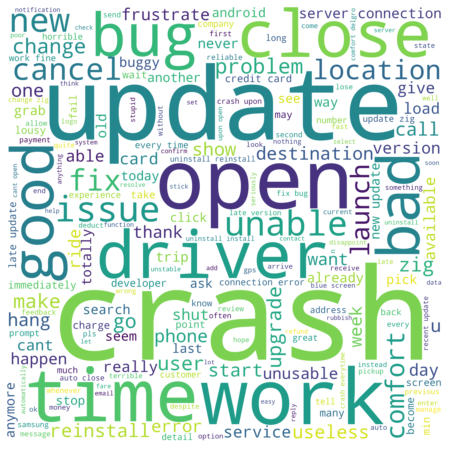

In [22]:
# 8. Word cloud

def wordcloud_func(words):
    wordcloud = WordCloud(width = 3000, height = 3000,
                      background_color = 'white',
                      min_font_size = 10).generate(words)
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    
# 8-1) Word cloud for all reviews
all_review_wordcloud = wordcloud_func(remove_word_review)


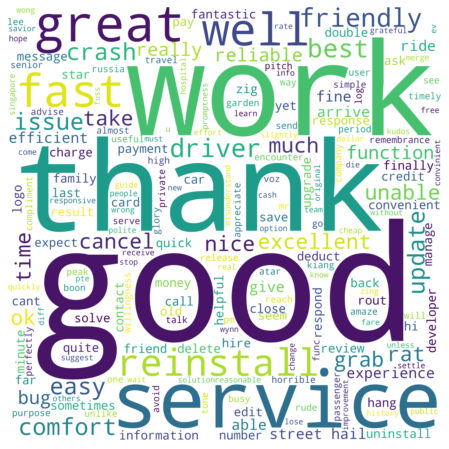

In [24]:
# 8-2) Word cloud for positive reviews
positive_review_wordcloud = wordcloud_func(remove_word_positive_review)

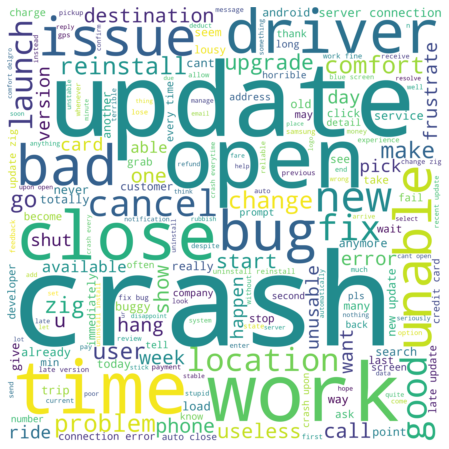

In [25]:
# 8-3) Word cloud for negative reviews
negative_review_wordcloud = wordcloud_func(remove_word_negative_review)

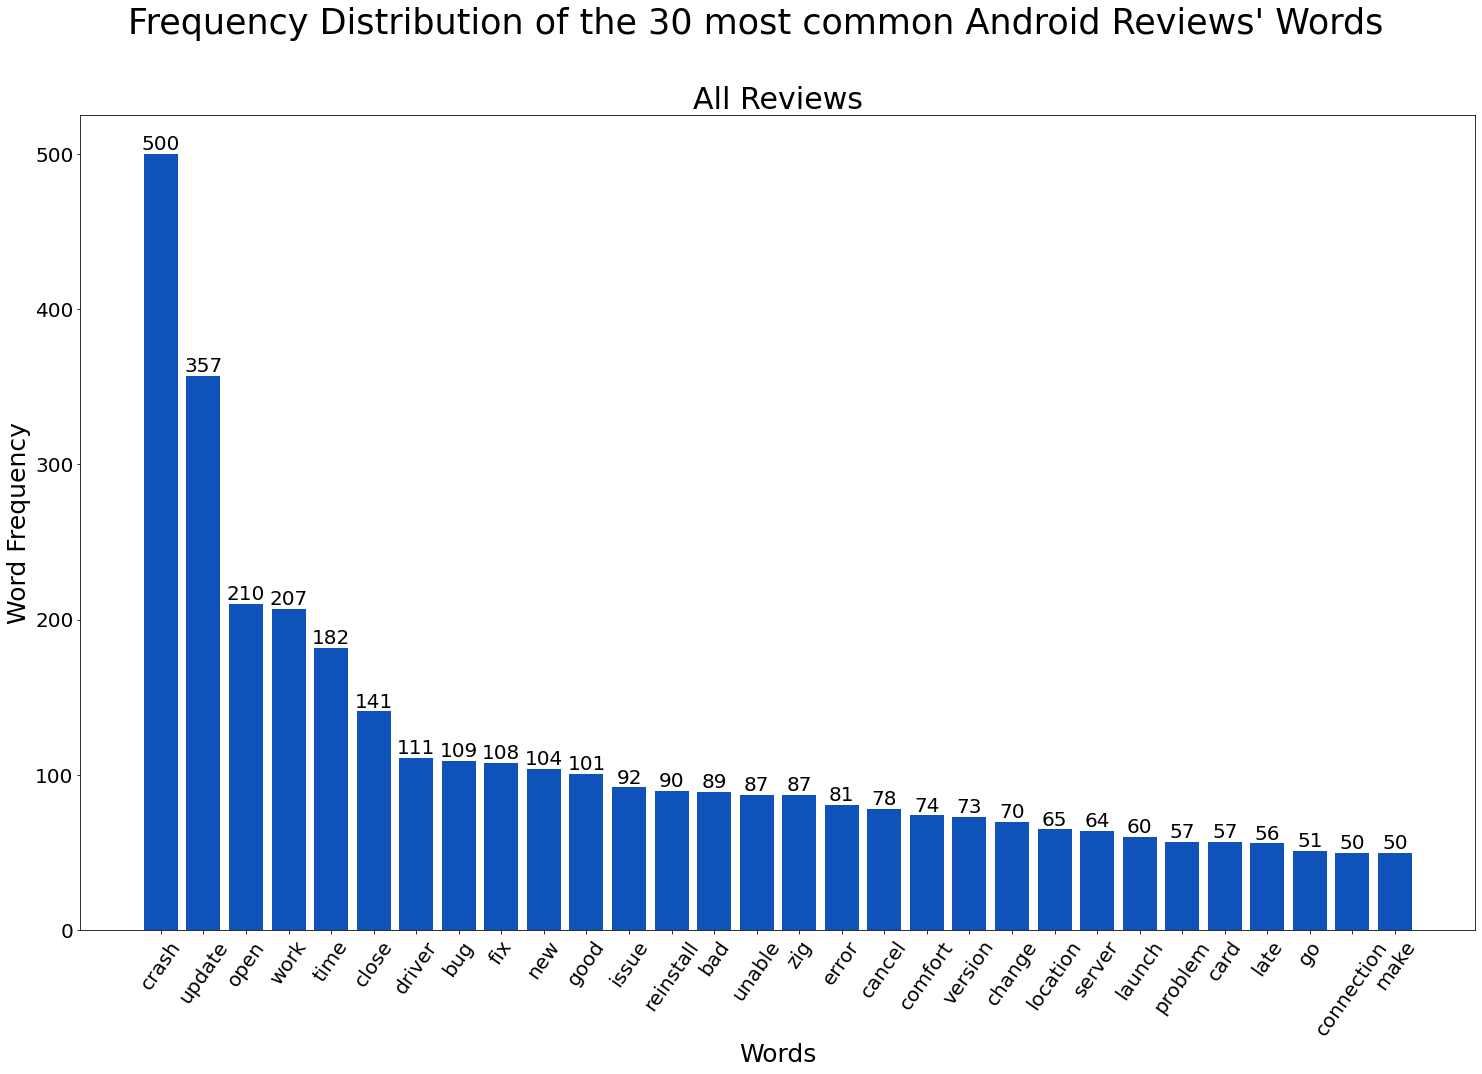

In [27]:
# 9. Word frequency bar chart
def word_freq_bar_func(X, Y, width, color, title):
    fig = plt.figure(figsize=(25, 15))
    fig.patch.set_facecolor('white')
    plt.bar(X, Y, 0.8, color = color)
    plt.xlabel('Words', fontsize=25)
    plt.ylabel('Word Frequency', fontsize=25)
    plt.suptitle("Frequency Distribution of the 30 most common Android Reviews' Words", fontsize=35)
    plt.title(title, fontsize=30)
    
    # text annotation
    for a,b in zip(X, Y):
        plt.text(a, b+0.05, '%.0f' % b, ha='center', va='bottom', fontsize=20)
    
    # Change x_label's direction
    plt.tick_params(labelsize=20)
    plt.xticks(rotation=55) # Or change rotation=45 to rotation='vertical'
    plt.show()

# 9-1) Word frequency bar chart for all reviews
df_most_common_30_words = df_Word_frequency.head(30)
X1 = df_most_common_30_words['Word']
Y1 = df_most_common_30_words['Word_frequency']
color1 = '#0F52BA'
title1 = "All Reviews"
All_review_bar = word_freq_bar_func(X1, Y1, 0.8, color1, title1)


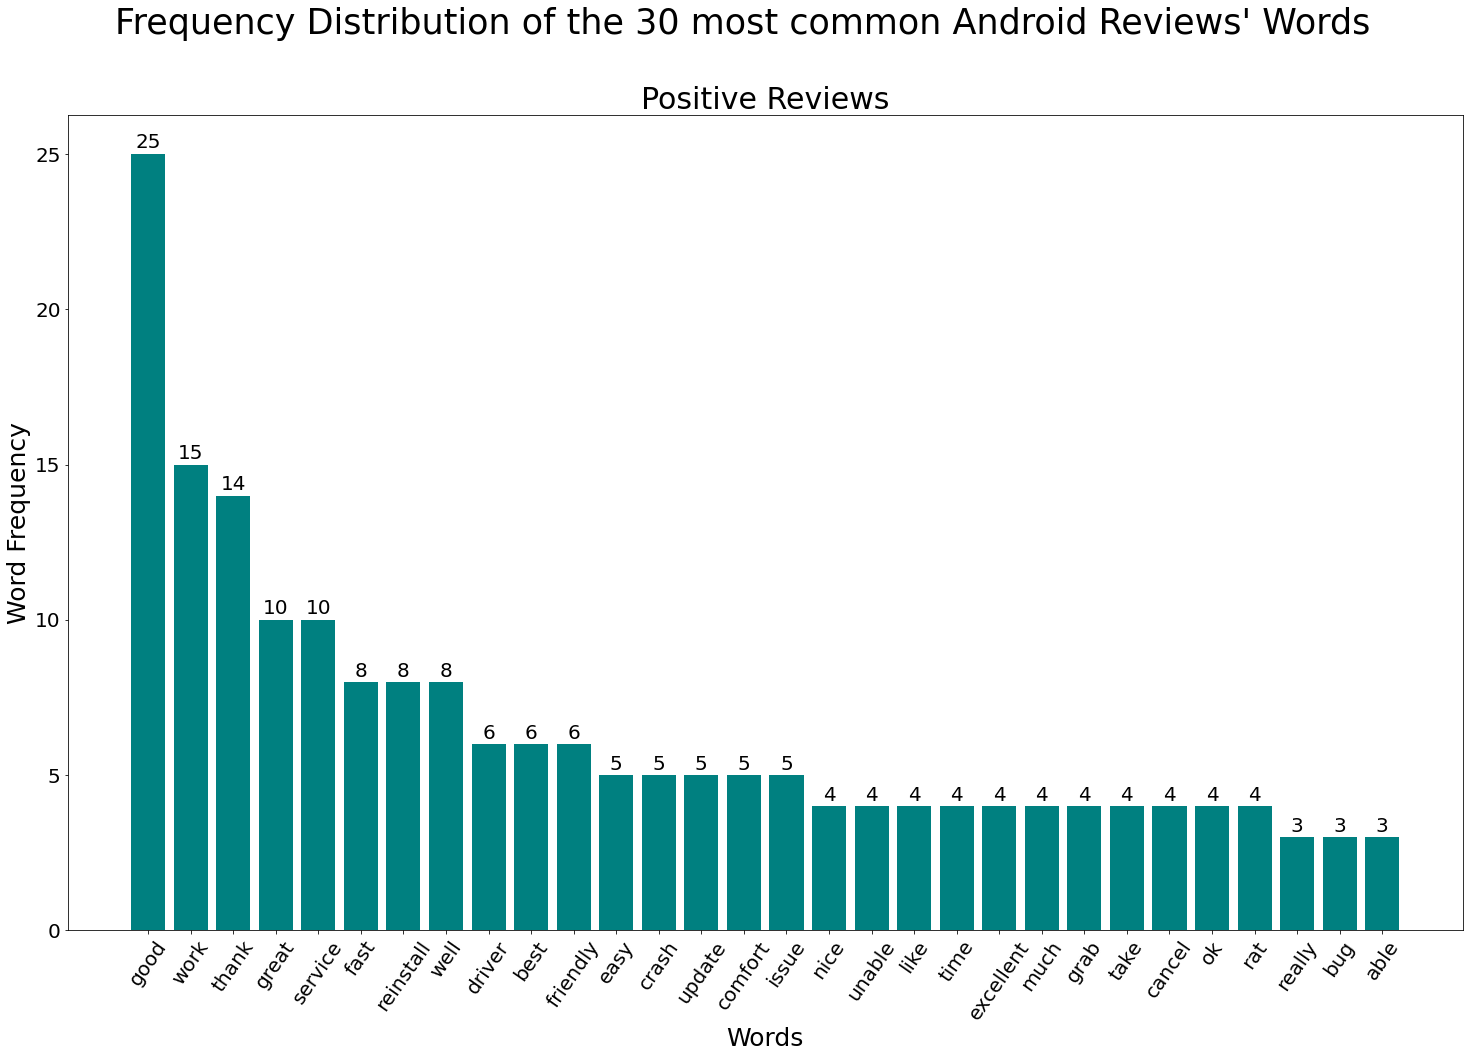

In [28]:
# 9-2) Word frequency bar chart for positive reviews
df_positive_most_30_common_words = Word_frequency_func(remove_word_positive_review).head(30)
X2 = df_positive_most_30_common_words['Word']
Y2 = df_positive_most_30_common_words['Word_frequency']
color2 = '#008080'
title2 = "Positive Reviews"
All_review_bar = word_freq_bar_func(X2, Y2, 0.8, color2, title2)

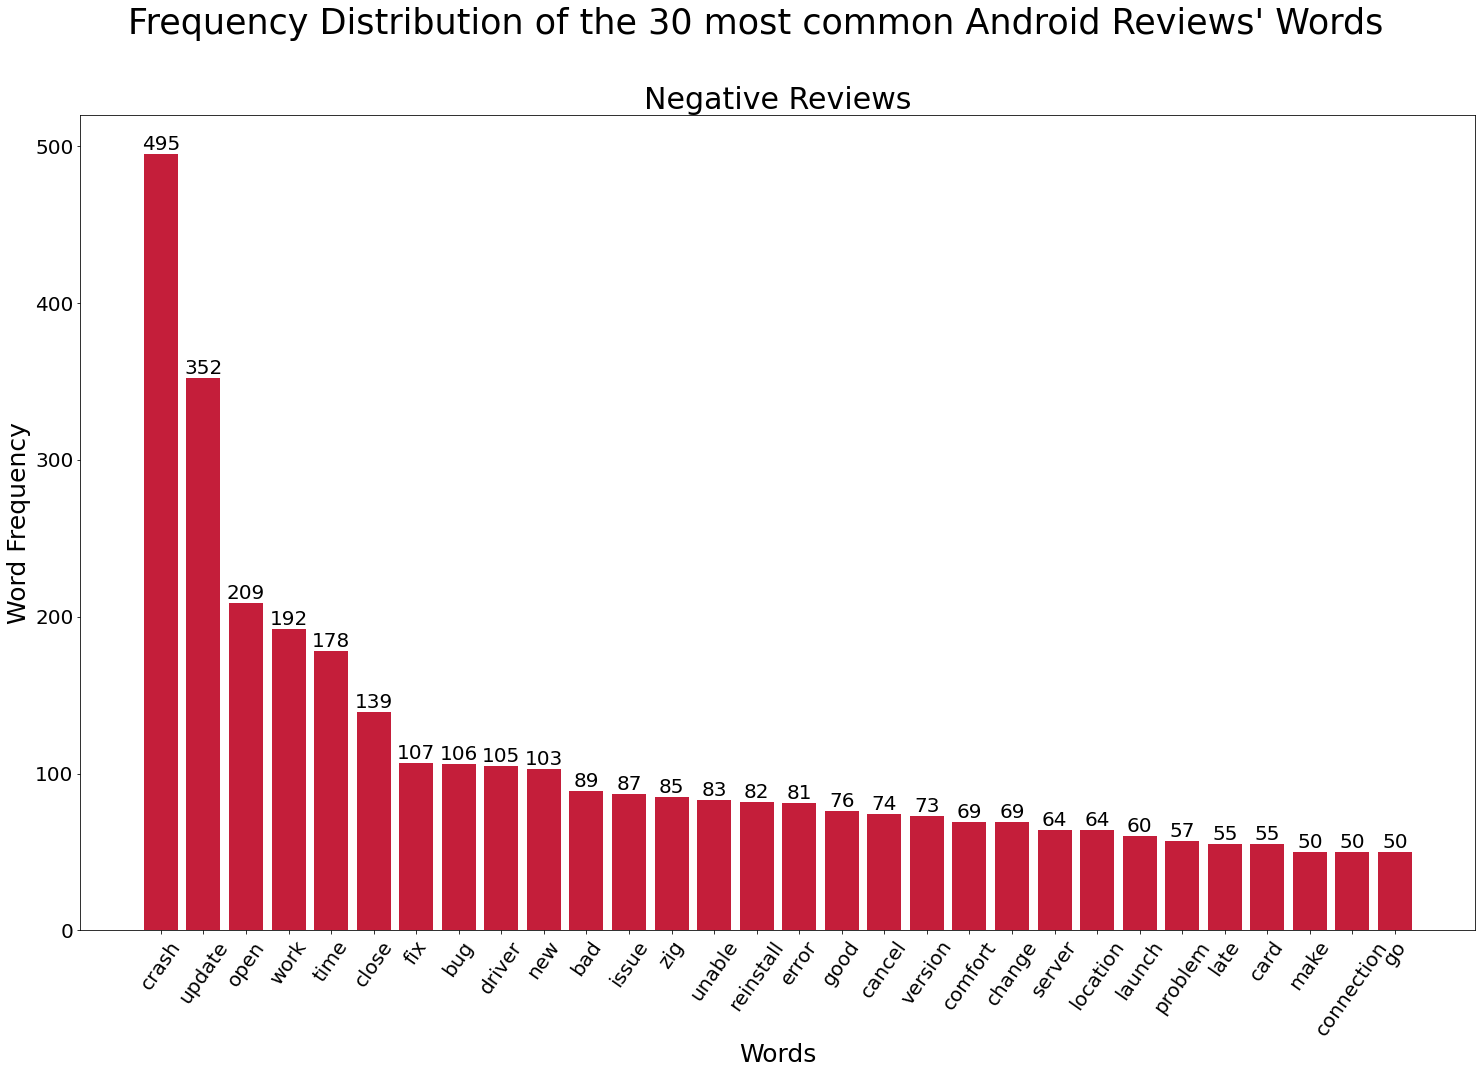

In [29]:
# 9-3) Word frequency bar chart for negative reviews
df_negative_most_30_common_words = Word_frequency_func(remove_word_negative_review).head(30)
X3 = df_negative_most_30_common_words['Word']
Y3 = df_negative_most_30_common_words['Word_frequency']
color3 = '#C41E3A'
title3 = "Negative Reviews"
All_review_bar = word_freq_bar_func(X3, Y3, 0.8, color3, title3)

In [72]:
# 10. Count the daily & total number for reviews
review_count = filter_reviews

# 10-1) Daily number for reviews
# 10-1-1) Daily number for all reviews
df_count_all_daily = pd.DataFrame({'Count_of_review':review_count.groupby(['at'])["Summary_of_Issues"].count()})
df_count_all_daily = df_count_all_daily.sort_values(by = 'at', ascending = False)
df_count_all_daily

,Count_of_review
at,
2022-07-31,4
2022-07-30,10
2022-07-29,17
2022-07-28,5
2022-07-27,1
...,...
2022-05-05,36
2022-05-04,42
2022-05-03,28


In [71]:
# 10-1-2) Daily number for positive/negative reviews
review_count['Label'] = review_count['score'].apply(label_func)

df_count_label_daily = pd.DataFrame({'Count_of_review_label':review_count.groupby(['at','Label'])["Summary_of_Issues"].count()})
df_count_label_daily = df_count_label_daily.sort_values(by = 'at', ascending = False)
df_count_label_daily

/var/folders/vm/2qwzk39s5s5d1352z57dndwm0000gn/T/ipykernel_30230/2648988471.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_count['Label'] = review_count['score'].apply(label_func)


Count_of_review_label
at         Label                          
2022-07-31 negative                      4
2022-07-30 positive                      4
           negative                      6
2022-07-29 negative                     17
2022-07-28 positive                      3
...                                    ...
2022-05-03 positive                      1
           negative                     27
2022-05-02 negative                     24
2022-05-01 positive                      1
           negative                     27

[150 rows x 1 columns]

In [100]:
# 10-2) Total number for reviews
# 10-2-1) Total number for all reviews
df_count_all_total = pd.DataFrame({"Name":"All reviews",
                                   "Count_of_review":review_count['Summary_of_Issues'].count()}, index=[0])
df_count_all_total

,Name,Count_of_review
0,All reviews,1385


In [99]:
# 10-2-2) Total number for positive/negative reviews
df_count_label_total = pd.DataFrame({'Count_of_label':review_count.groupby('Label')["Summary_of_Issues"].count()})
df_count_label_total

,Count_of_label
Label,
negative,1279
positive,106


In [94]:
# 11. Count the daily & total number for star-rating (1-5)
# 11-1) Daily number for star-rating
df_count_rating_daily = pd.DataFrame({"Count_of_rating":review_count.groupby(['at', 'score'])['Summary_of_Issues'].count()})
df_count_rating_daily = df_count_rating_daily.sort_values(by = 'at', ascending = False)
df_count_rating_daily

Count_of_rating
at         score                 
2022-07-31 4                    1
           1                    3
2022-07-30 5                    4
           1                    6
2022-07-29 1                   17
...                           ...
2022-05-02 4                    1
2022-05-01 3                    1
           2                    2
           5                    1
           1                   24

[277 rows x 1 columns]

In [98]:
# 11-2) Total number for star-rating
df_count_rating_total = pd.DataFrame({"Count_of_rating":review_count.groupby('score')["Summary_of_Issues"].count()})
df_count_rating_total

,Count_of_rating
score,
1,1078
2,97
3,57
4,47
5,106
